# ESS 5010 Assignment 3 Outline

Michael Stewart, SN: 214693626


## Abstract

Idenitifcation of RSOs is vital for Space Situation awareness. There are multiple methods to determine an RSO from a star. We know that the data provided is in Sideral Stare Mode, therefore Stars will not streak in the image and RSOs will. We can use this knowledge with OpenCV in Python to identify streaks and label them as RSOS. 

Characteristics includes:
- Brightness
- Centroid X
- Centroid Y
- Scale (STD)- PSF
- Motion Vector X
- Motion Vector Y
- Background 
    


### Step 1

- Open up the CSV Files and access data within.
- Create a Cube of data such that each layer represents 1 csv file.
- Average all layers and export as .csv file for investigation as to parameters


In [1]:
#Shows how to open one file
import csv
import numpy as np
blank_matrix=[]
with open('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/0.csv',newline='') as csvfile:
    file=csv.reader(csvfile,delimiter=' ',quotechar='|')
    blank_matrix=np.array(file)

#Generates a matrix from the spreadsheet    
r=np.genfromtxt('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/0.csv',delimiter=',',dtype=None)


    


In [2]:
#Checks the shape of the matrix prodcued
print(np.shape(r))

(256, 256)


In [3]:
#Sets the number of frames iterated through
csv_num_lim=235;

In [4]:
#Change the file name every iteration
for i in range(0,csv_num_lim):
    filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
print(filename)

D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/234.csv


In [105]:
#Change the name and add it to a 3D matrix
import numpy as np
img_data=[]
label_data=[]
for i in range(0,csv_num_lim):
    img_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
    img_data.append(np.genfromtxt(img_filename,delimiter=',',dtype=None))
    label_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/labels/'+str(i)+'.csv')
    label_data.append(np.genfromtxt(label_filename,delimiter=',',dtype=None))
img_data=np.array(img_data);
label_data=np.array(label_data);

In [106]:
#All Csv Data is now in a 3 Dimensional Tensor. 
print(np.shape(img_data))
print(np.shape(label_data))

(235, 256, 256)
(235, 256, 256)


In [107]:
#Average over axis and Export as a single 'Averaged Image'
mean_label_data=np.mean(label_data,axis=0)

#Write csv File
np.savetxt('label_means.csv',mean_label_data,delimiter=',')

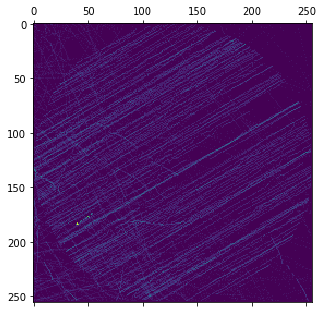

In [108]:
#Plot labels in 3D
import matplotlib.pyplot as plt
plt.matshow(mean_label_data)
plt.rcParams["figure.figsize"]=(5,5)
plt.show()



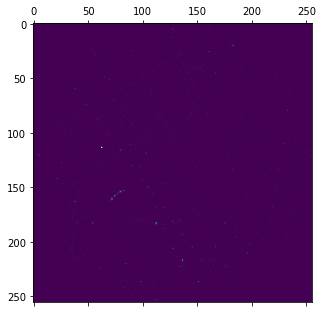

In [109]:
#Plot Image Data
mean_img_data=np.mean(img_data,axis=0)
plt.matshow(mean_img_data)
plt.show()
plt.rcParams['figure.figsize']=(5,5)



From these averaged images of the labels and the images we can get an idea of what were dealing with. From the labels average image we see that our sideral stare mode isn't perfect and that some stars travel across the image. The high level of the averages at this point idicate that all stars travel from bottom left to top right of the sensors while the RSOs typically travel is much different paths. 

## Streak Detection- Probabilistic Detections

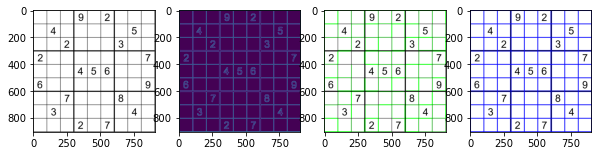

In [181]:
#Example of Houghlines implementation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
orignal_img=plt.imread('D:\School\Grad School Summer 2021\Assignment3Git\SampleData\Sudoku_Puzzle.png')
pic=cv.imread('D:\School\Grad School Summer 2021\Assignment3Git\SampleData\Sudoku_Puzzle.png')
pic3=cv.imread('D:\School\Grad School Summer 2021\Assignment3Git\SampleData\Sudoku_Puzzle.png')
gray=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,20,None,None,7) #detect Edges

#Probalistic

lines=cv.HoughLinesP(edges,1,np.pi/180,200,1,80)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(pic,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlinesP1.jpg',pic);

# Non-Probability
lines2=cv.HoughLines(edges,1,np.pi/180,200,None,0,0)
for line in lines2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(pic3,(x1,y1),(x2,y2),(0,0,255),2)
cv.imwrite('houghlines1.jpg',pic3)    


fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,4,1)
plt.imshow(orignal_img);
fig.add_subplot(1,4,2)
plt.imshow(edges)
fig.add_subplot(1,4,3)
plt.imshow(pic);
fig.add_subplot(1,4,4)
plt.imshow(pic3);

## Save CSV Composite image

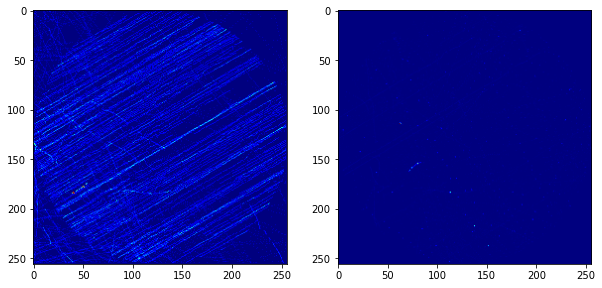

In [132]:
cmap=plt.cm.jet #Adds Color Map
norm=plt.Normalize(vmin=mean_label_data.min(),vmax=mean_label_data.max()) #Normalizes Data
image=cmap(norm(mean_label_data))

plt.imsave('mean_label_data.png',image)

#Save Images composite 
norm=plt.Normalize(vmin=mean_img_data.min(),vmax=mean_img_data.max()) #Normalizes Data
image2=cmap(norm(mean_img_data))

plt.imsave('mean_img_data.png',image2)

fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image);
fig.add_subplot(1,2,2)
plt.imshow(image2);

## Use Line Detection on Created  Labeled Image

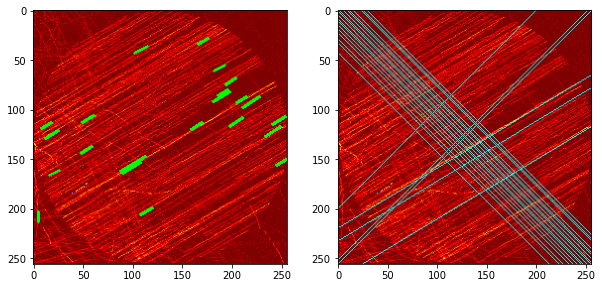

In [179]:
pic=cv.imread('mean_label_data.png')
pic3=cv.imread('mean_label_data.png')
gray=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,0.005,5,None,7) #Detect Edges
lines=cv.HoughLinesP(edges,1,np.pi/180,15,0,10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(pic,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlinesP_mean_Labels.jpg',pic);
# Non-Probability
lines2=cv.HoughLines(edges,1,np.pi/180,150)
for line in lines2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(pic3,(x1,y1),(x2,y2),(0,255,255),1)
cv.imwrite('houghlines_mean_labels.png',pic3)
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(pic);
fig.add_subplot(1,2,2)
plt.imshow(pic3);

We see that when there are so many lines in the labeled image that it appears by the Open CV code to be one object

Are the results simply tilted? Lets test this out using a Titled Sudoku image

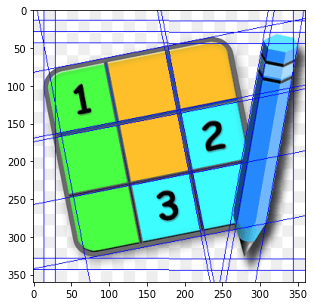

In [156]:
pic=cv.imread('D:\School\Grad School Summer 2021\Assignment3Git\SampleData\sudokutilt2.png')
gray=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,20,None,None,7) #detect Edges
lines2=cv.HoughLines(edges,1,np.pi/180,150,None,0,0)
for line in lines2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(pic,(x1,y1),(x2,y2),(0,0,255),1)
cv.imwrite('tiltedSodukoLines.jpg',pic) 
plt.imshow(pic)

Looks Fine. Lets create a function to easily process these images

In [186]:
def PLine(imgfilename,hys1,hys2,thrsld,minline,maxline):
    #hys1= Hystersis Threshold minVal <hys1 will be discarded
    #hys2= Hystersis Threshold maxVal >maxVal will be automatically 
    
    pic=cv.imread(imgfilename)
    gray=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #Covnert to Black and White
    edges=cv.Canny(gray,hys1,hys2,None,7) #Detect Edges
    lines=cv.HoughLinesP(edges,1,np.pi/180,thrsld,minline,maxline)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv.line(pic,(x1,y1),(x2,y2),(0,255,0),2)
    edited_imgfilename=(imgfilename.split('.'))[0]+('_Lines.png')
    cv.imwrite(imgfilename,pic);
    plt.imshow(pic)

## Use Line Detection on Created Image Data

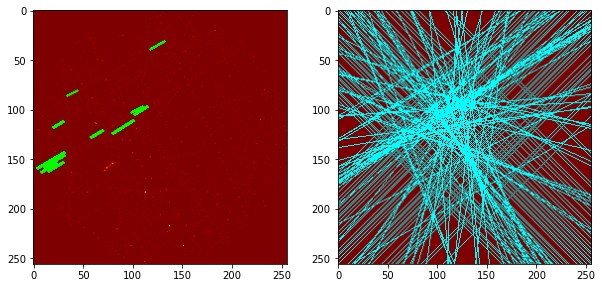

In [200]:
pic=cv.imread('mean_img_data.png')
pic3=cv.imread('mean_img_data.png')
gray=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,0.005,5,None,7) #Detect Edges
lines=cv.HoughLinesP(edges,1,np.pi/180,100,0,10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(pic,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlinesP_mean_Img.jpg',pic);
# Non-Probability
lines2=cv.HoughLines(edges,1,np.pi/180,100)
for line in lines2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(pic3,(x1,y1),(x2,y2),(0,255,255),1)
cv.imwrite('houghlines_mean_imgs.png',pic3)
fig=plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(pic);
fig.add_subplot(1,2,2)
plt.imshow(pic3);

This isn't as effective has I had hoped. lets look at finding the difference between sets of images.

## Different Method: Scene Subtraction

We need to find an effective flat frame without RSOs. We can do this by looking at the labeled data and seeing if we have a frame that we know doesn't have an RSO in it. This will give us th emost accurate reference frame. Any frame may be chosen but may not be effective as there will be residual data left. Do note that the frame still posesses uncalibrated data such as hot pixels.

In [238]:
# This funciton gives the count of RSOs in the labeled data
occurances=np.count_nonzero(label_data==1,axis=1)   
occurances=np.sum(occurances,axis=1) #Now we have a list of number of RSOs in a foccurrame
reference_index=np.argmin(occurances)
   


We can now use this index to find a decent reference frame

57249.0

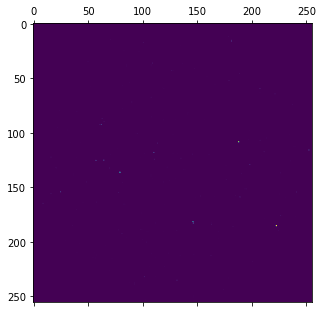

In [257]:
img_data[reference_index][:][:]
plt.matshow(img_data[reference_index][:][:])
np.max(img_data[reference_index][:][:])

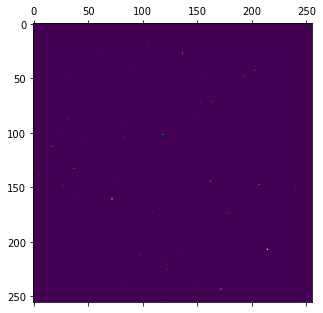

In [245]:
img_data[0][:][:]
plt.matshow(img_data[0][:][:])

In [243]:
np.mean(img_data[reference_index][:][:])

4337.509124755859

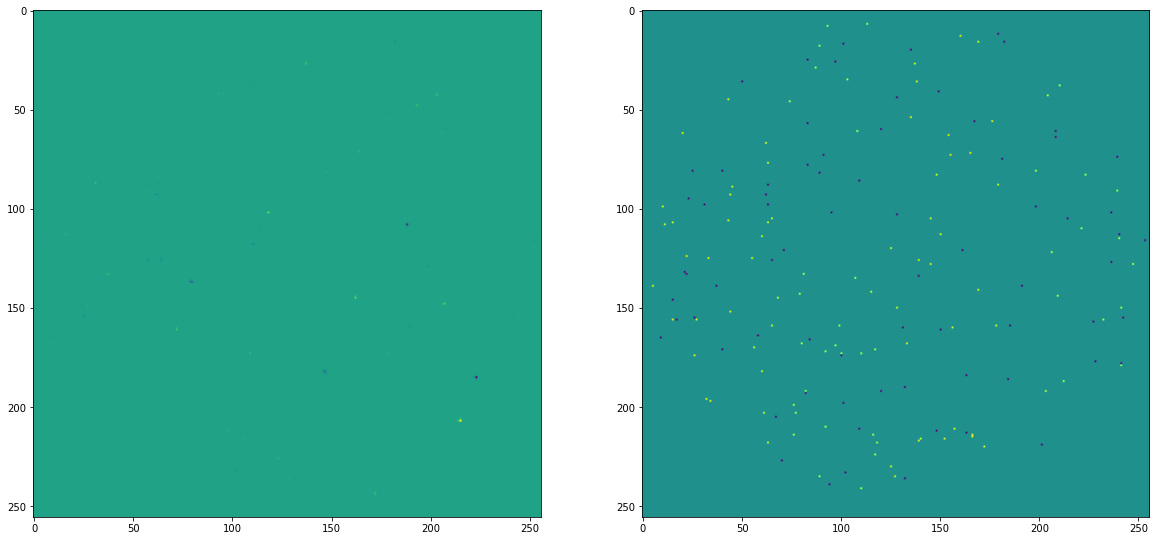

In [286]:
difference_img_frame=img_data[0][:][:]-img_data[reference_index][:][:];


for i in range(0,len(label_data[0][:][:])):
    for j in range(0,len(label_data[0][:][:])):
        if label_data[0][i][j]==1:
            label_data[0][i][j]=0;

difference_lbl_frame=label_data[0][:][:]-label_data[reference_index][:][:];


fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(difference_img_frame)
fig.add_subplot(1,2,2)
plt.imshow(difference_lbl_frame);

As we can see in the images above, scene subtraction is unreliable due to the rate of stars moving. 

In [321]:
import numpy as np
partial_img_data=[]
partial_label_data=[]
for i in range(0,5):
    img_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
    partial_img_data.append(np.genfromtxt(img_filename,delimiter=',',dtype=None))
    label_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/labels/'+str(i)+'.csv')
    partial_label_data.append(np.genfromtxt(label_filename,delimiter=',',dtype=None))
partial_img_data=np.array(partial_img_data);
partial_label_data=np.array(partial_label_data);

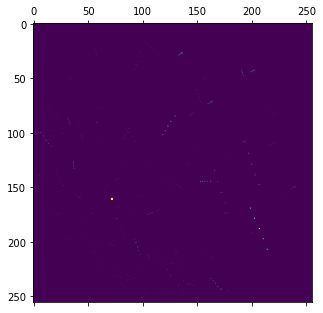

In [322]:
mean_partial_img_data=np.mean(partial_img_data,axis=0)
mean_partial_label_data=np.mean(partial_label_data,axis=0)
plt.matshow(mean_partial_img_data)
plt.show()

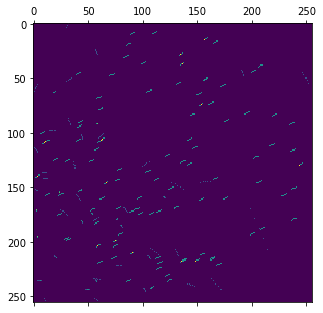

In [323]:
plt.matshow(mean_partial_label_data)

In [379]:
#Save Images composite 
import csv
cmap=plt.cm.jet #Adds Color Map
norm=plt.Normalize(vmin=mean_partial_img_data.min(),vmax=mean_partial_img_data.max()) #Normalizes Data
image3=cmap(norm(mean_partial_img_data))

plt.imsave('mean_partial_img_data.png',image3)

#write csv file
with open ('mean_partial_img_data.csv','w+',newline='') as file:
    writer=csv.writer(file)
    writer.writerows(mean_partial_img_data)



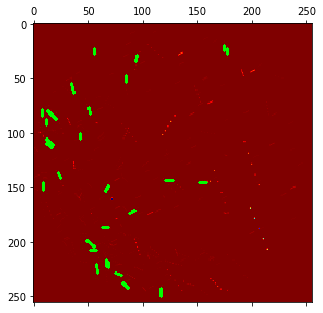

In [327]:
pic4=cv.imread('mean_partial_img_data.png')
gray=cv.cvtColor(pic4,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,0.005,5,None,7) #Detect Edges
lines=cv.HoughLinesP(edges,1,np.pi/180,5,0,5)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(pic4,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlinesP_mean_partial_img_data.jpg',pic4);

plt.matshow(pic4);

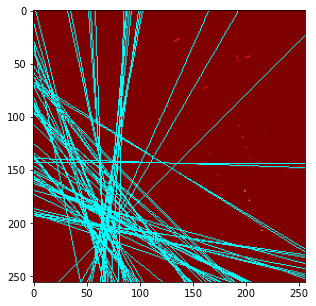

In [337]:
pic5=cv.imread('mean_partial_img_data.png')
gray=cv.cvtColor(pic5,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,0.005,5,None,7) #Detect Edges
lines2=cv.HoughLines(edges,1,np.pi/180,45)
for line in lines2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(pic5,(x1,y1),(x2,y2),(0,255,255),1)
cv.imwrite('houghlines_mean_partial_img_data.png',pic5)
plt.imshow(pic5)

This still doens't give  a good result. 

## Finding a Solution

It looks like there isn't a good consistent way of automatically identifying RSOs with the Open CV system. The next approach will be to create a custom function to compare the magnitude of the point sources in image (5 frames), create a search aperature around the point source for other similar magnitude (given a certain percent difference in magntitude) and adding these to a catalogue

### Scan Function

Much like a TV we will be scanning the composite 5 frame image using a Left-Right, Top-Down approach.

In [372]:
np.shape(mean_partial_img_data)[1]

256

Create a list of pixels that are above a certain threshold

In [384]:

Maglist=[]
binarymat=np.zeros(np.shape(mean_partial_img_data));
for row in range(0,np.shape(mean_partial_img_data)[0]):
    for column in range(0,np.shape(mean_partial_img_data)[0]):
        if mean_partial_img_data[row][column] > np.mean(mean_partial_img_data):
            #threshold value is the man of the values
            
            Maglist.append([row,column,mean_partial_img_data[row][column]])
            binarymat[row][column]=1;
            #Add to a list of values to search for
            #Add to Master Object List
        

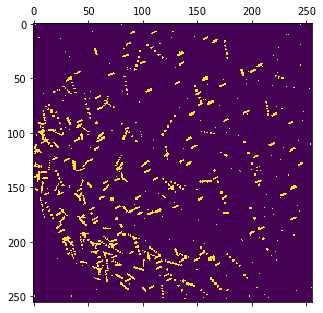

In [385]:
#Below shows an illustration of all the points over the threshold

plt.matshow(binarymat)

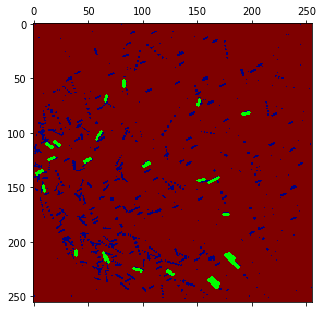

In [398]:
#Lets test this binary image with the open CV line
norm=plt.Normalize(vmin=binarymat.min(),vmax=binarymat.max()) #Normalizes Data
binaryimage=cmap(norm(binarymat))
plt.imsave('binaryimage.png',binaryimage)
binarypicwithlines=cv.imread('binaryimage.png')
gray=cv.cvtColor(binarypicwithlines,cv.COLOR_BGR2GRAY) #Covnert to Black and White
edges=cv.Canny(gray,0.005,5,None,7) #Detect Edges
lines=cv.HoughLinesP(edges,1,np.pi/180,5,0,5)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(binarypicwithlines,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlinesP_binaryimage.jpg',binarypicwithlines);

plt.matshow(binarypicwithlines);

Well this doesn't work that well. Lets go back to finding a better solution...

Now that we have identified all the important pixels to look for we can create a search function to find point sources of similar magntitude, consider their distance away from each other and classify them as a vector  

## Example: First Point

In [399]:
Maglist[0] #This gives the coordinates of the first magntitude above the mean. and the magntiude

[1, 2, 4339.2]

In [424]:
#Here we can set a lower limit and upper limit for comparing brightness values of stars
Percent_deviaiton_limit=0.3 #Percent deviaiton limit
if Maglist[0][2]-Maglist[0][2]*Percent_deviaiton_limit > np.mean(mean_partial_img_data):
    lowerlimit=Maglist[0][2]-Maglist[0][2]*Percent_deviaiton_limit
else:
    lowerlimit=np.mean(mean_partial_img_data)
    #If example point 
upperlimit=Maglist[0][2]+Maglist[0][2]*Percent_deviaiton_limit
idx=np.where((mean_partial_img_data>lowerlimit) & (mean_partial_img_data<upperlimit))
#finds the indexes of array where the values are within limits

In [444]:
#Finds the distances of the points with similar magnitudes
distances=([idx[0]-Maglist[0][0],idx[1]-Maglist[0][1]])
distances_magnitude=np.linalg.norm(distances,axis=0)
#mean_partial_img_data[idx]

In [445]:
#Spits out distances between similar points
distances_magnitude

array([  0.        ,  79.        , 243.        , ..., 329.08357601,
       285.95454184, 305.98365969])

In [446]:
distances

[array([  0,   0,   0, ..., 250, 251, 251], dtype=int64),
 array([  0,  79, 243, ..., 214, 137, 175], dtype=int64)]

In [448]:
np.linalg.norm([4,9])

9.848857801796104

Taking a look at our data we see that the largest distance between dots is found in the bottom right o
f our partially integrated image. From this we can go an approximation of our maximum distance to consider in our program. Looking at the image produced and comparing it to it's csv data we see the distance between the points of a line is around 10

In [468]:
indx2= np.where((distances_magnitude < 10) & (distances_magnitude != 0))

In [469]:
indx2

(array([], dtype=int64),)

This means that there are no values that meet our requirements. This makes sense for our first identified point

## Example: Large Line

In [484]:
#we know that this point is part of the large line in the bottom right corner
Reference_Point=mean_partial_img_data[197][211]

In [485]:
Percent_deviaiton_limit=0.3 #Percent deviaiton limit
if Reference_Point-Reference_Point*Percent_deviaiton_limit > np.mean(mean_partial_img_data):
    lowerlimit=Reference_Point-Reference_Point*Percent_deviaiton_limit
else:
    lowerlimit=np.mean(mean_partial_img_data)
    #If example point 
upperlimit=Reference_Point+Reference_Point*Percent_deviaiton_limit
idx=np.where((mean_partial_img_data>lowerlimit) & (mean_partial_img_data<upperlimit))
#finds the indexes of array where the values are within limits

In [486]:
#Finds the distances of the points with similar magnitudes
distances=([idx[0]-197,idx[1]-211])
distances_magnitude=np.linalg.norm(distances,axis=0)
#mean_partial_img_data[idx]


In [488]:
distances_magnitude

array([29.54657341, 19.6977156 ,  0.        , 10.77032961])

In [492]:
distances

[array([-27, -18,   0,  10], dtype=int64),
 array([-12,  -8,   0,   4], dtype=int64)]

We know that there are should be five point here. So lets edit the percent deviaiton

In [491]:
mean_partial_img_data[197-9][211-4]

20378.2

In [493]:
Percent_deviaiton_limit=0.4 #Percent deviaiton limit
if Reference_Point-Reference_Point*Percent_deviaiton_limit > np.mean(mean_partial_img_data):
    lowerlimit=Reference_Point-Reference_Point*Percent_deviaiton_limit
else:
    lowerlimit=np.mean(mean_partial_img_data)
    #If example point 
upperlimit=Reference_Point+Reference_Point*Percent_deviaiton_limit
idx=np.where((mean_partial_img_data>lowerlimit) & (mean_partial_img_data<upperlimit))
#finds the indexes of array where the values are within limits

In [494]:
#Finds the distances of the points with similar magnitudes
distances=([idx[0]-197,idx[1]-211])
distances_magnitude=np.linalg.norm(distances,axis=0)
#mean_partial_img_data[idx]

In [495]:
distances 

[array([-107,  -52,  -28,  -27,  -18,    0,   10], dtype=int64),
 array([-85, -58, -12, -12,  -8,   0,   4], dtype=int64)]

The next step is to max out the number of 'distances' points to 5- since this is our number of frames. we should also restrict the distance. 

In [498]:
indx2= np.where((distances_magnitude < 11) & (distances_magnitude != 0))

In [504]:
distances_magnitude[indx2][0]

10.770329614269007

We know that there's another point north west of our chosen reference point about 10 pixels away. It is out of the percent deviation range therefore it is not considered. This may prove to be an issue in the future.

##